In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps_per_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df




,Chirps_per_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.isnull().sum()
#There are no null values in both columns

Chirps_per_Second     0
Ground_Temperature    0
dtype: int64

In [4]:
df.dtypes
#All data samples are in format

Chirps_per_Second     float64
Ground_Temperature    float64
dtype: object

In [5]:
df.describe()


,Chirps_per_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
q1_chirps=df.Chirps_per_Second.quantile(.25)
q3_chirps=df.Chirps_per_Second.quantile(.75)
iqr_chirps=q3_chirps-q1_chirps
lower_limit_chirps=q1_chirps-1.5*iqr_chirps
upper_limit_chirps=q3_chirps+1.5*iqr_chirps
print(f'lower_limit and upper limit of dataset ({lower_limit_chirps},{upper_limit_chirps})')
min_value_chirps=df.Chirps_per_Second.min()
max_value1_chirps=df.Chirps_per_Second.max()
# #min_value,max_value
print(f'minimum value and maximum value of dataset ({min_value_chirps},{max_value1_chirps})')
print('\nThere are outliers in data as dataset are not in range of (lower_limit,upper_limit)\n')
# #Need to remove outliers in Chirps/Second series

q1_temp=df.Ground_Temperature.quantile(.25)
q3_temp=df.Ground_Temperature.quantile(.75)
iqr_temp=q3_temp-q1_temp
lower_limit_temp=q1_temp-1.5*iqr_temp
upper_limit_temp=q3_temp+1.5*iqr_temp
print(f'lower_limit and upper limit of dataset ({lower_limit_temp},{upper_limit_temp})')
min_value_temp=df.Ground_Temperature.min()
max_value_temp=df.Ground_Temperature.max()
# #min_value,max_value
print(f'minimum value and maximum value of dataset ({min_value_temp},{max_value_temp})')
print('\nNo  outliers in this dataset as min and max values are  in range of (lower_limit and upper_limit)')

lower_limit and upper limit of dataset (12.9,19.699999999999996)
minimum value and maximum value of dataset (14.4,20.0)

There are outliers in data as dataset are not in range of (lower_limit,upper_limit)

lower_limit and upper limit of dataset (58.400000000000006,98.4)
minimum value and maximum value of dataset (69.4,93.3)

No  outliers in this dataset as min and max values are  in range of (lower_limit and upper_limit)


In [7]:
df[(df.Chirps_per_Second<lower_limit_chirps)|(df.Chirps_per_Second>upper_limit_chirps)]
#Outliers data in dataset

,Chirps_per_Second,Ground_Temperature
0,20.0,88.6
2,19.8,93.3


In [8]:
df_no_outliers=df[(df.Chirps_per_Second>lower_limit_chirps)&(df.Chirps_per_Second<upper_limit_chirps)]

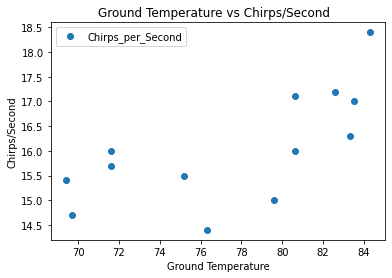

In [9]:
df_no_outliers.plot(x='Ground_Temperature',y='Chirps_per_Second',style='o')
plt.title('Ground Temperature vs Chirps/Second  ')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()
#Datasamples looks continuous around straight line but not clear so will check with correaltion formula

In [10]:
df_no_outliers.corr()
#correlation value is 0.68 so it fits under linear regression as it is not under (-.2,.2)

,Chirps_per_Second,Ground_Temperature
Chirps_per_Second,1.000000,0.680752
Ground_Temperature,0.680752,1.000000


In [11]:
#SPLIT the data to train and test the model
y=df_no_outliers[['Chirps_per_Second']]
X=df_no_outliers[['Ground_Temperature']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 7)

In [12]:
#SCALE data
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(X_train)
# x_train=scaler.transform(X_train)
# x_test=scaler.transform(X_test) #Only tranform test data , dont use to fit in model

In [13]:
#Modeling
from sklearn.linear_model import LinearRegression #IMPORT
regression=LinearRegression() #INITIALIZE MODEL
regression.fit(X_train,y_train) #learning happens here,fit train data to model,calculate loss function-GD,best parameters values are also calculated


LinearRegression()

In [14]:
c=regression.intercept_
m=regression.coef_
print('Intercept of the regression model:',c)
print('Coefficient of the regression model:',m)

Intercept of the regression model: [5.16065833]
Coefficient of the regression model: [[0.13773221]]


In [15]:
print('Predict test for Ground Temperature 95:')
print(regression.predict([[95]]))

Predict test for Ground Temperature 95:
[[18.24521798]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
Ground_temperature=(18-5.16)/0.138
print('Ground tempherature when Cricket chirping at 18 chirps per second:',Ground_temperature)

Ground tempherature when Cricket chirping at 18 chirps per second: 93.04347826086956


In [17]:
y_pred = regression.predict(X_test)
y_pred
#df_y_pred=pd.DataFrame(y_pred,columns=['Chirps_per_Second'])


array([[16.12414199],
       [16.2618742 ],
       [16.2618742 ],
       [15.02228434],
       [15.02228434],
       [16.77148337]])

In [18]:
y_test

,Chirps_per_Second
10,15.0
12,16.0
4,17.1
7,15.7
1,16.0
3,18.4


In [19]:
#R2 Evaluation metric
from sklearn import metrics
r2 = metrics.r2_score(y_test,y_pred)
r2

0.15872871803524002

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [21]:
df.isna().sum()
#There are no null values in dataset

Brain    0
Body     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [23]:
df.drop_duplicates()
#there are no duplicates

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


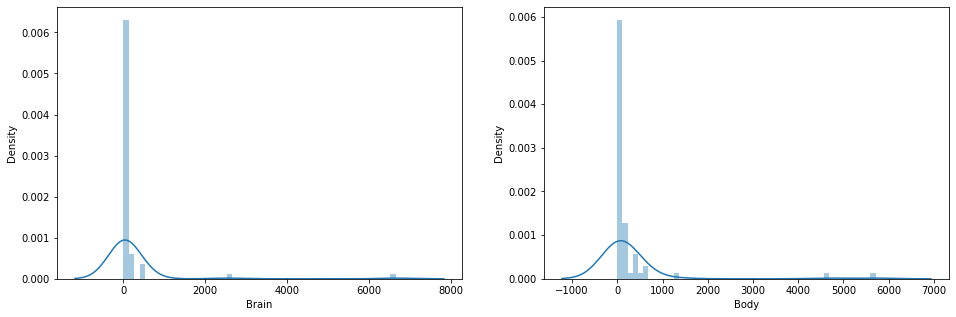

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Brain'])
plt.subplot(1,2,2)
sns.distplot(df['Body'])
plt.show()

In [25]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [26]:
q1_brain=df.Brain.quantile(.25)
q3_brain=df.Brain.quantile(.75)
iqr_brain=q3_brain-q1_brain
lower_limit_brain=q1_brain-1.5*iqr_brain
upper_limit_brain=q3_brain+1.5*iqr_brain
print(f'lower_limit and upper limit of dataset ({lower_limit_brain},{upper_limit_brain})')
min_value_brain=df.Brain.min()
max_value_brain=df.Brain.max()
print(f'minimum value and maximum value of dataset ({min_value_brain},{max_value_brain})')

q1_body=df.Body.quantile(.25)
q3_body=df.Body.quantile(.75)
iqr_body=q3_body-q1_body
lower_limit_body=q1_body-1.5*iqr_body
upper_limit_body=q3_body+1.5*iqr_body
print(f'Lower limit and Upper limit of dataset ({lower_limit_body},{upper_limit_body})')
min_value_body=df.Body.min()
max_value_body=df.Body.max()
print(f'Min and Max values in dataset ({min_value_body},{max_value_body})')


lower_limit and upper limit of dataset (-70.80375000000001,119.60625)
minimum value and maximum value of dataset (0.005,6654.0)
Lower limit and Upper limit of dataset (-238.375,408.625)
Min and Max values in dataset (0.14,5712.0)


In [27]:
df_no_outliers1=df[((df.Brain>lower_limit_brain)&(df.Brain<upper_limit_brain))&((df.Body>lower_limit_body)&(df.Body<upper_limit_body))]
#Removed outliers

In [28]:
df_no_outliers1.describe()

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


iqr=4.22375-0.31625=3.9075
upper_limit=q3+1.5*iqr=10.085 < max 
outliers still exist in Brain
lower_limit=q1-1.5*iqr=0.31625-1.5*3.9075=-5.545 < min
iqr=45.8
upper_limit=48.925+1.5*45.8=117.625 < max
outliers exist in Body
lower_limit=3.125-1.5*45.8=-65.575 < min

In [29]:
# q3_brain=df_no_outliers1.Brain.quantile(.75)
# q1_brain=df_no_outliers1.Brain.quantile(.25)
# iqr1_brain=q3_brain-q1_brain
# decider1_brain=iqr1_brain*1.5
# upper1_brain=q3_brain+decider1_brain
# lower1_brain=q1_brain-decider1_brain


# q3_body=df_no_outliers1.Body.quantile(.75)
# q1_body=df_no_outliers1.Body.quantile(.25)
# iqr1_body=q3_body-q1_body
# decider1_body=iqr1_body*1.5
# upper1_body=q3_body+decider1_body
# lower1_body=q1_body-decider1_body

# df_no_outliers11=df_no_outliers1[(df_no_outliers1.Brain>lower1_brain)&(df_no_outliers1.Brain<upper1_brain)&(df_no_outliers1.Body>lower1_body)&(df_no_outliers1.Body<upper1_body)]
# df_no_outliers11.describe()


# q33_brain=df_no_outliers11.Brain.quantile(.75)
# q11_brain=df_no_outliers11.Brain.quantile(.25)
# iqr11_brain=q33_brain-q11_brain
# decider11_brain=iqr11_brain*1.5
# upper11_brain=q33_brain+decider11_brain
# lower11_brain=q11_brain-decider11_brain



# q33_body=df_no_outliers11.Body.quantile(.75)
# q11_body=df_no_outliers11.Body.quantile(.25)
# iqr11_body=q33_body-q11_body
# decider11_body=iqr11_body*1.5
# upper11_body=q33_body+decider11_body
# lower11_body=q11_body-decider11_body

# df_no_outliers111=df_no_outliers11[(df_no_outliers11.Brain>lower11_brain)&(df_no_outliers11.Brain<upper11_brain)&(df_no_outliers11.Body>lower11_body)&(df_no_outliers11.Body<upper11_body)]
# #df_no_outliers111.describe()

# q333_brain=df_no_outliers111.Brain.quantile(.75)
# q111_brain=df_no_outliers111.Brain.quantile(.25)
# iqr111_brain=q333_brain-q111_brain
# decider111_brain=iqr111_brain*1.5
# upper111_brain=q333_brain+decider111_brain
# lower111_brain=q111_brain-decider111_brain



# q333_body=df_no_outliers111.Body.quantile(.75)
# q111_body=df_no_outliers111.Body.quantile(.25)
# iqr111_body=q333_body-q111_body
# decider111_body=iqr111_body*1.5
# upper111_body=q333_body+decider111_body
# lower111_body=q111_body-decider111_body

# df_no_outliers1111=df_no_outliers111[(df_no_outliers111.Brain>lower111_brain)&(df_no_outliers111.Brain<upper111_brain)&(df_no_outliers111.Body>lower111_body)&(df_no_outliers111.Body<upper111_body)]
# df_no_outliers1111.describe()
# #print(upper1,lower1)
# # df_no_outliers111=df_no_outliers11[(df_no_outliers11.Body <upper11)&(df_no_outliers11.Body >lower11)]
# # #df_no_outliers111.describe()
# # #Still body data have outliers
# # q3333=df_no_outliers111.Body.quantile(.75)
# # q1111=df_no_outliers111.Body.quantile(.25)
# # iqr1111=q3333-q1111
# # decider11=iqr1111*1.5
# # upper111=q3333+decider
# # lower111=q1111-decider
# # #print(upper1,lower1)
# # df_no_outliers1111=df_no_outliers111[(df_no_outliers111.Body <upper111)&(df_no_outliers111.Body >lower111)]
# # df_no_outliers1111.describe()



In [30]:
df_no_outliers1.corr()
#This will fit in linear regression

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [31]:
#SPLIT the data
from sklearn.model_selection import train_test_split
X=df_no_outliers1[['Brain']].values
Y=df_no_outliers1[['Body']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=7)

In [32]:
#SCALE the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
#x_test = scaler.transform(X_test)
scaler.fit(Y_train)
y_train=scaler.transform(Y_train)
#y_test=scaler.transform(Y_test)


In [33]:
#MODEL
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [34]:
regression.coef_

array([[2.27493035]])

In [35]:
regression.intercept_

array([19.14086658])

In [36]:
y_pred=regression.predict(X_test)

In [37]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(Y_test,y_pred))

R2- SCORE: 0.5261500008070958


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [38]:
df = pd.read_fwf("salary.txt", header=None,names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [39]:
df.isna().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [40]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [41]:
df.drop_duplicates().count()

Sex       52
Rank      52
Year      52
Degree    52
YSdeg     52
Salary    52
dtype: int64

In [42]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [43]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [77]:
iqr_year=11.000000-3.000000
upper_limit=11.000000+iqr_year*1.5
lower_limit=3.000000-iqr_year*1.5
#print(lower_limit,upper_limit)
# (0.000000,25.000000)

# iqr_ysdeg=11.000000-3.000000
# upper_limit=11.000000+iqr_ysdeg*1.5
# lower_limit=3.000000-iqr_ysdeg*1.5
# print(lower_limit,upper_limit)
# (0,25.000000)


In [78]:
df_no_outliers=df[(df.Year>lower_limit)&(df.Year<upper_limit)]
df_no_outliers.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.274510,2.019608,7.137255,0.647059,15.745098,23551.529412
std,0.450708,0.860005,4.967976,0.482640,9.965627,5701.015742
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.500000,18189.500000
50%,0.000000,2.000000,7.000000,1.000000,15.000000,23713.000000
75%,1.000000,3.000000,10.500000,1.000000,23.000000,26900.000000
max,1.000000,3.000000,19.000000,1.000000,33.000000,38045.000000


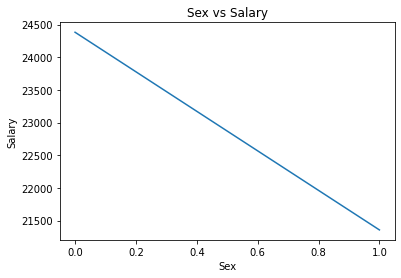

In [46]:
df_no_outliers.groupby('Sex')['Salary'].mean().plot()

plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
#Negative Correlation

In [47]:
df_no_outliers[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.239125
Salary,-0.239125,1.000000


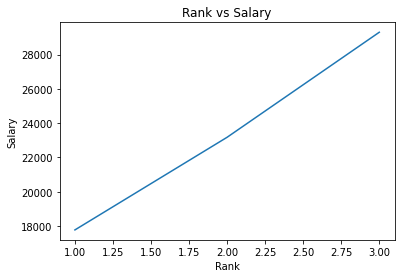

In [48]:
df_no_outliers.groupby('Rank')['Salary'].mean().plot()

plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [49]:
df_no_outliers[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.870674
Salary,0.870674,1.000000


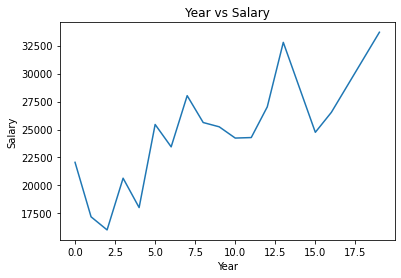

In [50]:
df_no_outliers.groupby('Year')['Salary'].mean().plot()

plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [51]:
df_no_outliers[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.664026
Salary,0.664026,1.000000


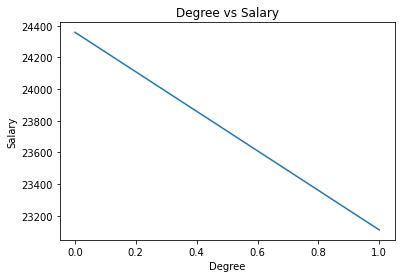

In [52]:
df_no_outliers.groupby('Degree')['Salary'].mean().plot()

plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [53]:
df_no_outliers[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.105675
Salary,-0.105675,1.000000


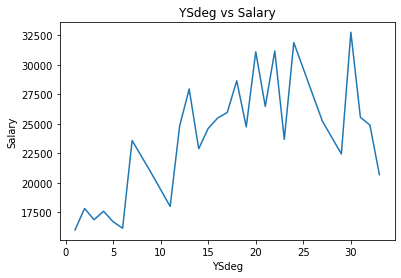

In [54]:
df_no_outliers.groupby('YSdeg')['Salary'].mean().plot()

plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [55]:
df_no_outliers[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.647787
Salary,0.647787,1.000000


In [93]:
#Sex,Rank,YSdeg are in correlation with Salary
#SPLIT
#X=df_no_outliers[['Sex','Rank','Year','YSdeg']].values
X=df_no_outliers[['Rank','Year','YSdeg']].values
y=df_no_outliers[['Salary']].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.3,random_state=7)


In [79]:
#SCALE
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler() 
# scaler.fit(X_train,y_train) 
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [95]:
# coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank','Year','YSdeg'], columns=['Coefficient'])
# y_pred = regressor.predict(X_test_scaled)
# coeff_df

In [96]:
regressor.coef_

array([[4754.63238243,  408.12477887,  -17.18468002]])

In [97]:
regressor.intercept_

array([11365.15652995])

In [98]:
y_pred=regressor.predict(X_test)

In [99]:
from sklearn import metrics
#print('R2- SCORE with Sex as feature included:', metrics.r2_score(Y_test,y_pred))
#R2- SCORE: 0.5641211620687545

In [100]:
print('R2- SCORE without Sex as feature:', metrics.r2_score(Y_test,y_pred))

R2- SCORE without Sex as feature: 0.6801168243516441
